<a href="https://colab.research.google.com/github/deepak-io-codes/OBISIP/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(df.isnull().sum())

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df.head()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Year                                       0
Month                                      0
dtype: int64


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [ ]:
df.columns = df.columns.str.strip()

print(df.isnull().sum())

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

display(df.head())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


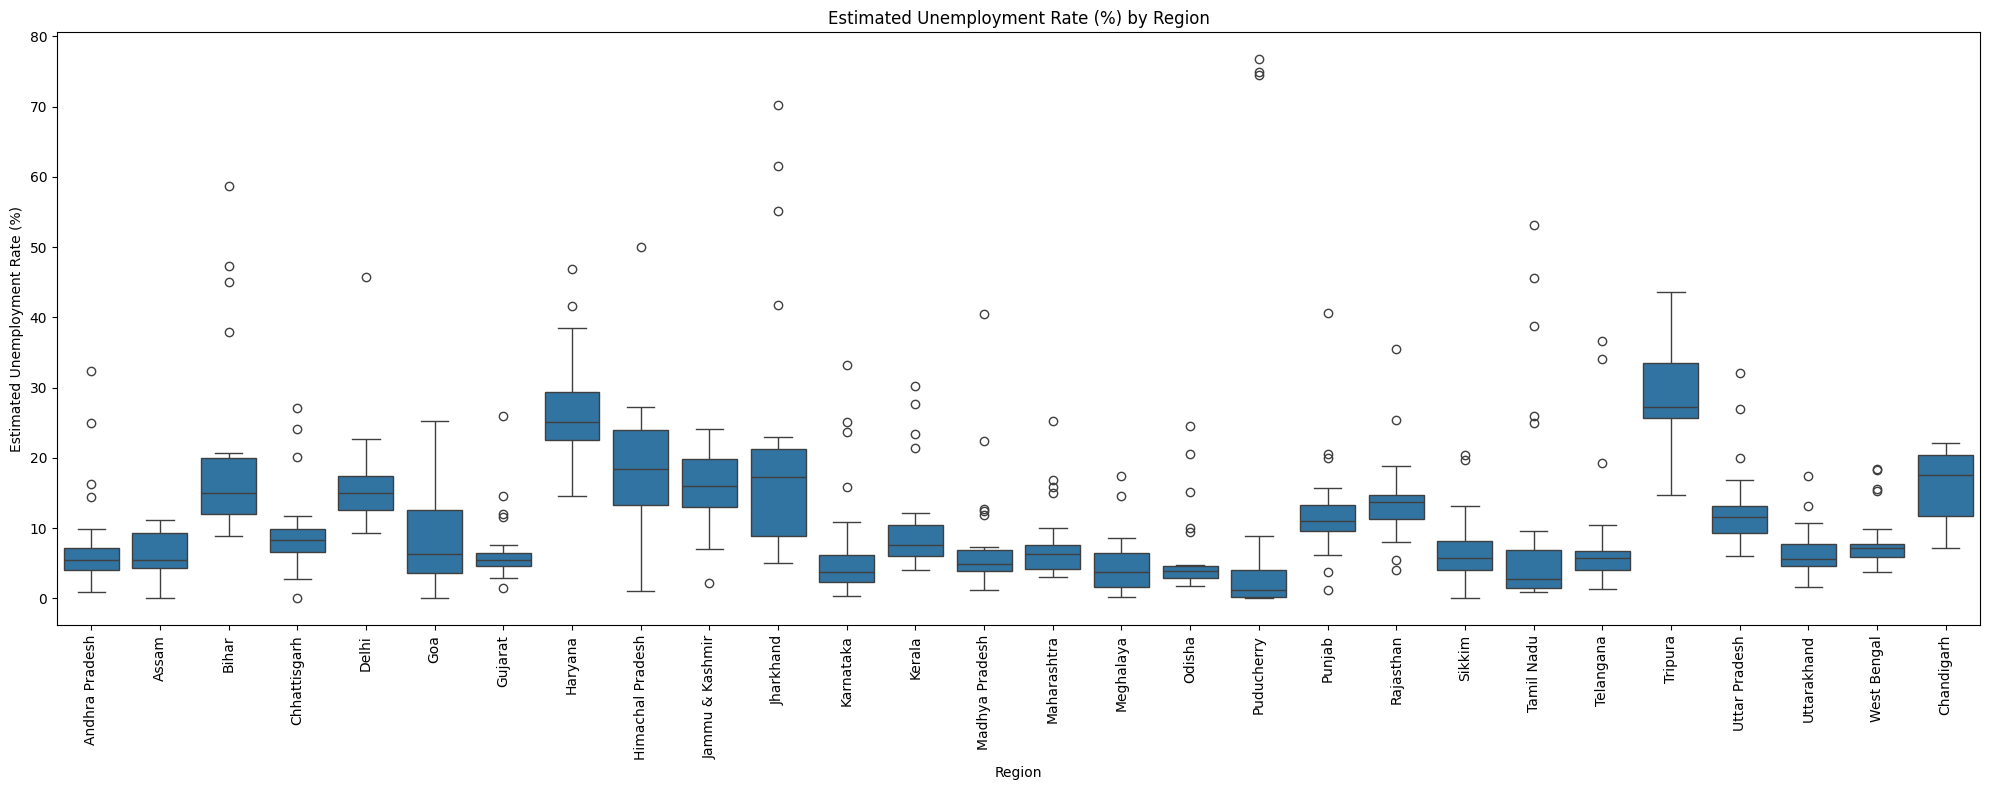

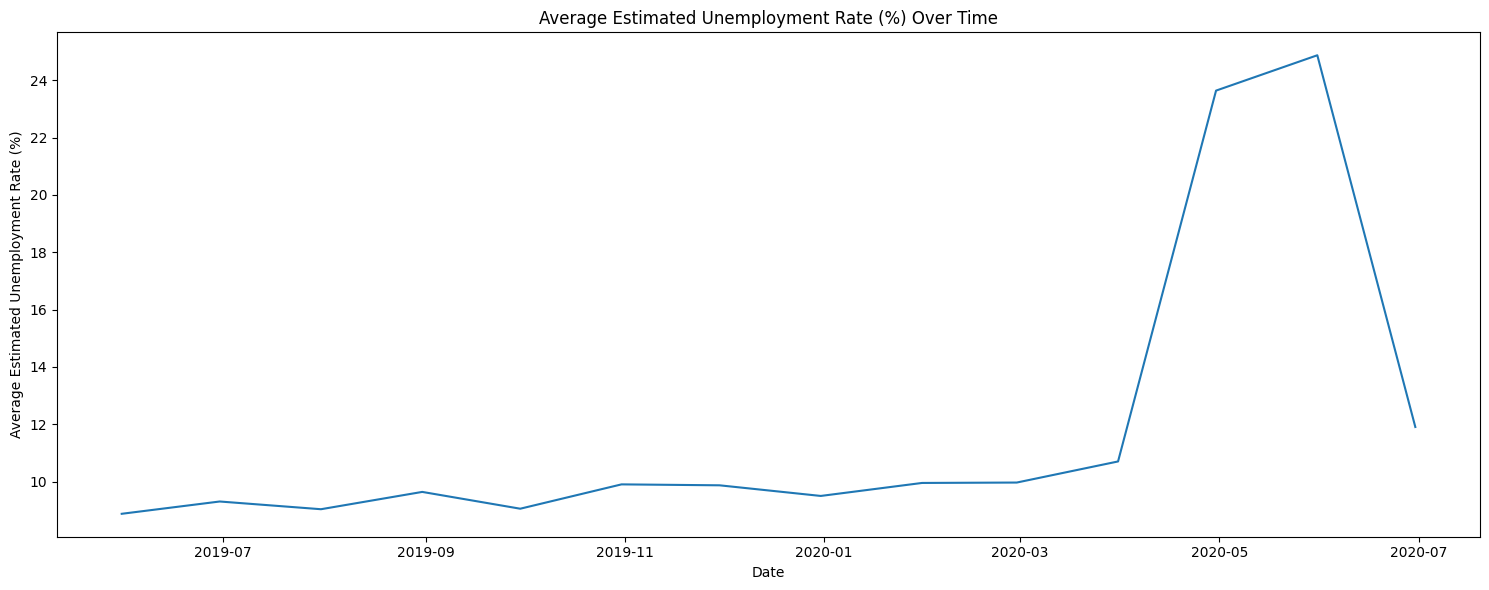

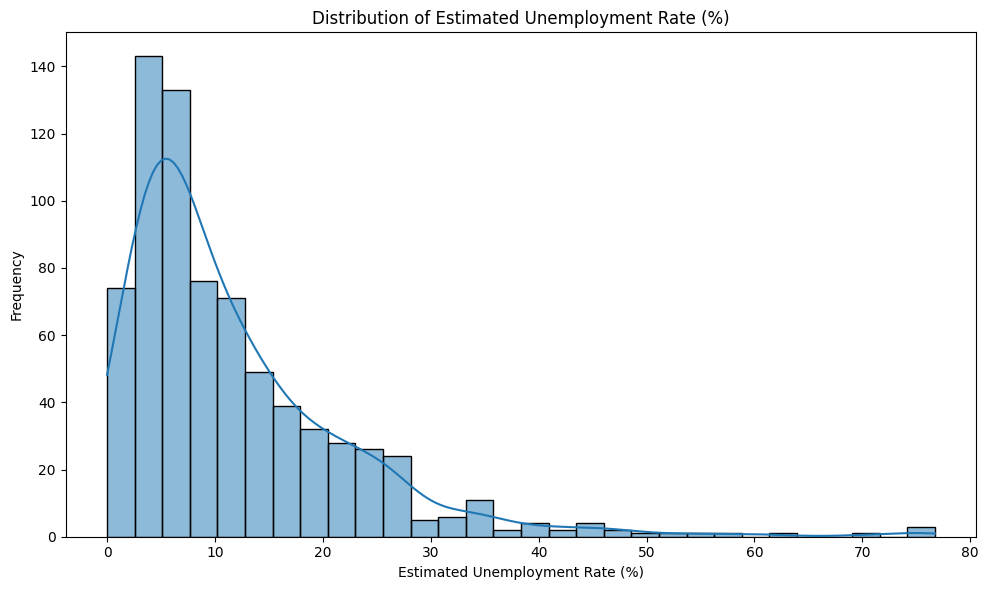

In [ ]:
print(df['Unemployment Rate (%)'].describe())

plt.figure(figsize=(20, 8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Estimated Unemployment Rate (%) by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
unemployment_by_date = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=unemployment_by_date)
plt.title('Average Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Estimated Unemployment Rate (%)', kde=True, bins=30)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
covid_df = df[df['Date'] >= '2020-03-01'].copy()

unemployment_by_region_date = covid_df.groupby(['Region', 'Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()

display(unemployment_by_region_date.head())

,Region,Date,Estimated Unemployment Rate (%)
0,Andhra Pradesh,2020-03-31,6.970
1,Andhra Pradesh,2020-04-30,24.295
2,Andhra Pradesh,2020-05-31,19.685
3,Andhra Pradesh,2020-06-30,3.355
4,Assam,2020-03-31,7.055


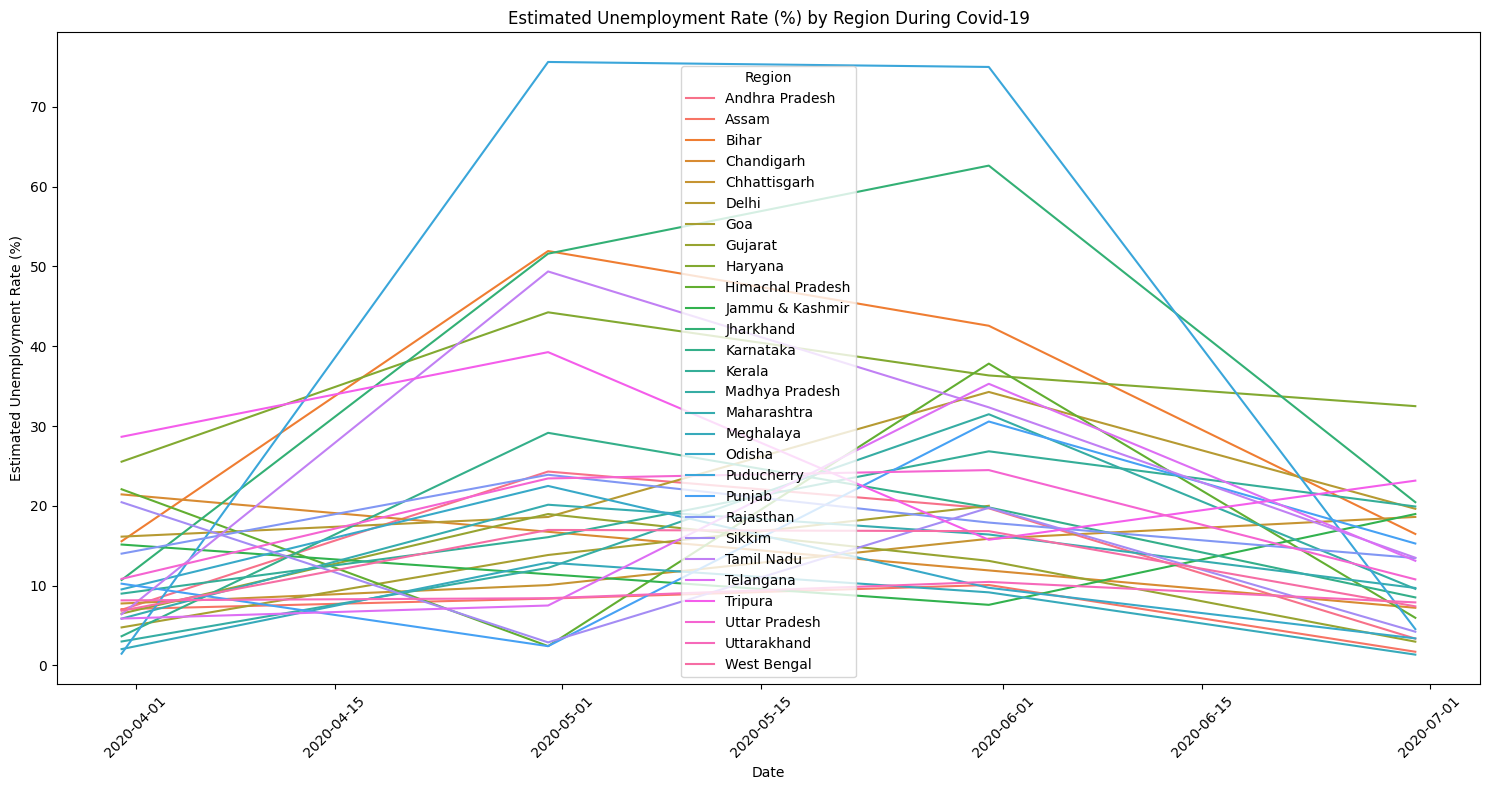

Regions with highest peak unemployment during Covid-19:


,Region,Date,Estimated Unemployment Rate (%)
69,Puducherry,2020-04-30,75.625
42,Jharkhand,2020-05-31,62.635
9,Bihar,2020-04-30,51.930
85,Tamil Nadu,2020-04-30,49.370
30,Haryana,2020-04-30,44.250



Regions with lowest peak unemployment during Covid-19:


,Region,Date,Estimated Unemployment Rate (%)
17,Chhattisgarh,2020-06-30,18.605
105,West Bengal,2020-04-30,16.975
61,Meghalaya,2020-04-30,12.885
102,Uttarakhand,2020-05-31,10.465
6,Assam,2020-05-31,10.075


In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=unemployment_by_region_date)
plt.title('Estimated Unemployment Rate (%) by Region During Covid-19')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

peak_unemployment = unemployment_by_region_date.loc[unemployment_by_region_date.groupby('Region')['Estimated Unemployment Rate (%)'].idxmax()]
peak_unemployment_sorted = peak_unemployment.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

print("Regions with highest peak unemployment during Covid-19:")
display(peak_unemployment_sorted.head())

print("\nRegions with lowest peak unemployment during Covid-19:")
display(peak_unemployment_sorted.tail())

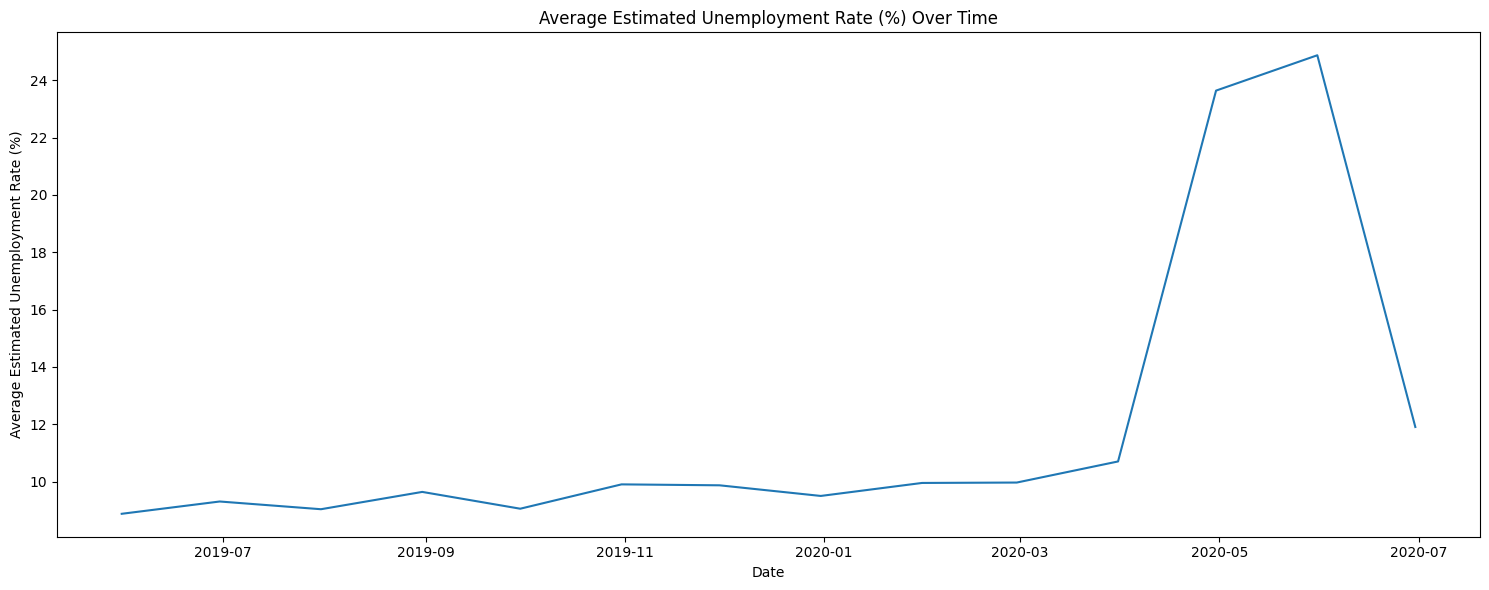

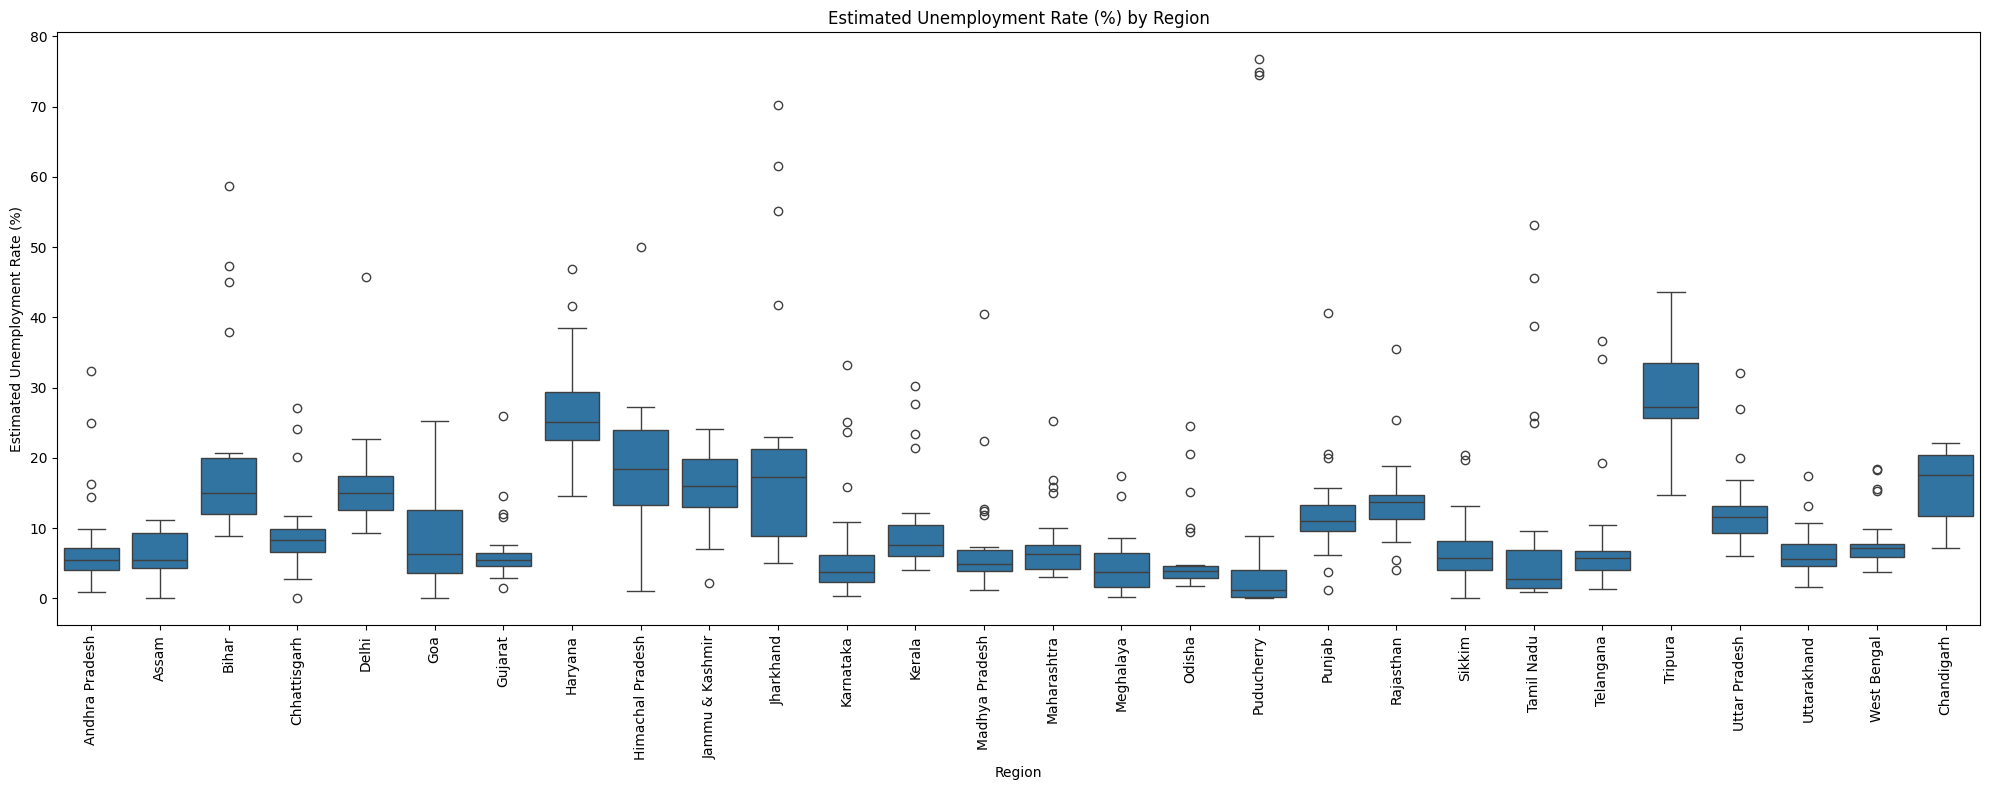

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=unemployment_by_date)
plt.title('Average Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 8))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Estimated Unemployment Rate (%) by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()